In [54]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

import pandas as pd
import matplotlib.pyplot as plt

#Prcp data between 1/1/17 and 1/1/18

In [2]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///hawaii.db")

# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [3]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [33]:
#Create a session
session = Session(engine)

In [48]:
# Query date and prcp from Measurement
prcp_query = pd.read_sql_query("SELECT date, prcp FROM measurement_sql WHERE date between '2017-01-01' AND '2018-01-01';", engine)

In [49]:
prcp_df = pd.DataFrame(prcp_query)
prcp_df = prcp_df.set_index(date)
prcp_df.head()

,prcp
date,
2017-01-01,0.0
2017-01-02,0.0
2017-01-03,0.0
2017-01-04,0.0
2017-01-05,0.0


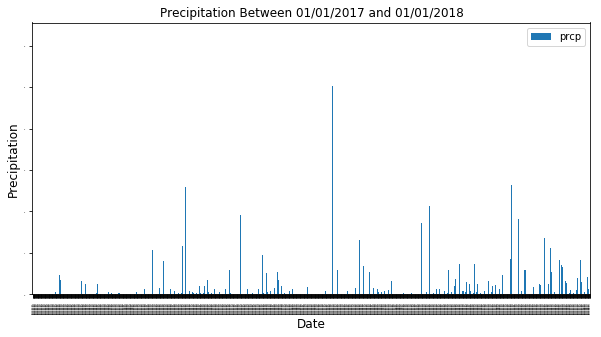

In [61]:
ax = prcp_df.plot(kind='bar', title ="Precipitation Between 01/01/2017 and 01/01/2018", figsize=(10, 5), legend=True, fontsize=2)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Precipitation", fontsize=12)
plt.show()